In [1]:
import ROOT
import pandas as pd

Welcome to JupyROOT 6.26/10


In [2]:
def draw(path, title_prefix):
    performance = ROOT.TFile.Open(path)
    keys = ["eff_tracks", "fakerate_tracks", "duplicaterate_tracks", "eff_particles", "fakerate_particles", "duplicaterate_particles"]
    values = [ performance.Get(key)[0] for key in keys ]
    df = pd.DataFrame({"key": keys, "value": values})
    print(df.to_string(formatters={"value": "{:.2%}".format}))
    
    for key in ['trackeff_vs_eta', 'duplicationRate_vs_eta']:
        c = ROOT.TCanvas()
        c.cd()
        c.SetWindowSize(200,100)
        
        plot = performance.Get(key)
        plot.SetTitle("{}: {}".format(title_prefix, key))
        plot.Draw()
        ROOT.gPad.Update()
        plot.GetPaintedGraph().SetMinimum(0)
        plot.GetPaintedGraph().SetMaximum(1)
        c.Draw()

                       key  value
0               eff_tracks 98.48%
1          fakerate_tracks  0.00%
2     duplicaterate_tracks 10.00%
3            eff_particles 99.10%
4       fakerate_particles  0.00%
5  duplicaterate_particles  8.59%


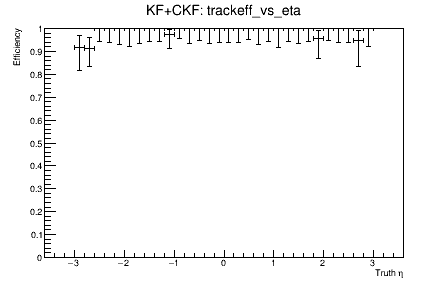

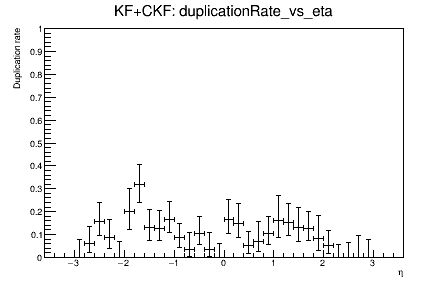

In [3]:
draw("../output/performance_kf_plus_ckf.root", "KF+CKF")

                       key  value
0               eff_tracks 99.41%
1          fakerate_tracks  0.00%
2     duplicaterate_tracks 50.94%
3            eff_particles 93.11%
4       fakerate_particles  0.00%
5  duplicaterate_particles 45.08%


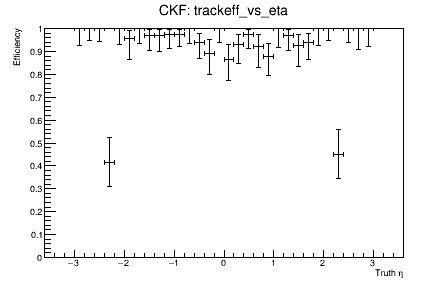

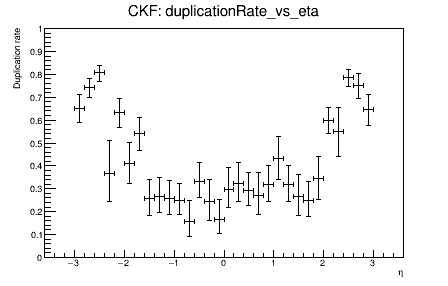

In [4]:
draw("../output/performance_ckf.root", "CKF")